# Python Data Science Handbook

## 5. Machine Learning

### Data Representation in Scikit-Learn

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### The Target Array

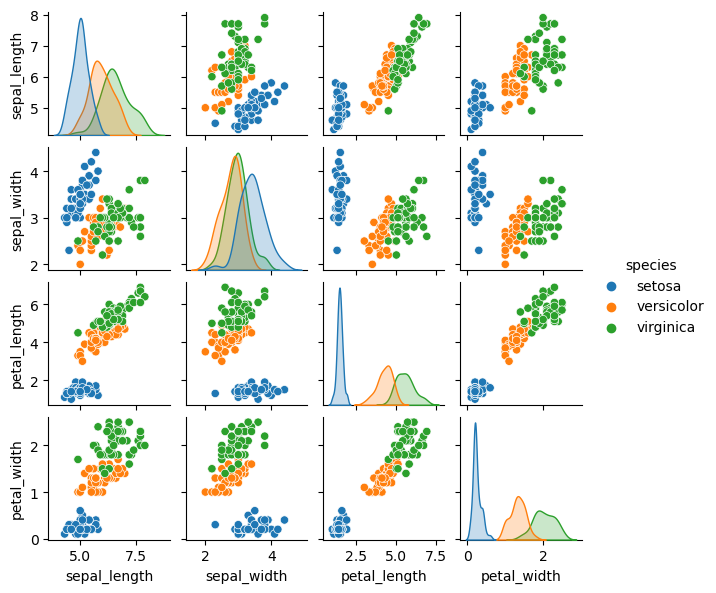

In [2]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue = 'species', height = 1.5);

In [5]:
X_iris = iris.drop('species', axis=  1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

In [12]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### Supervised Learning Example: Simple Linear Regression

In [13]:
import matplotlib.pyplot as plt
import numpy as np

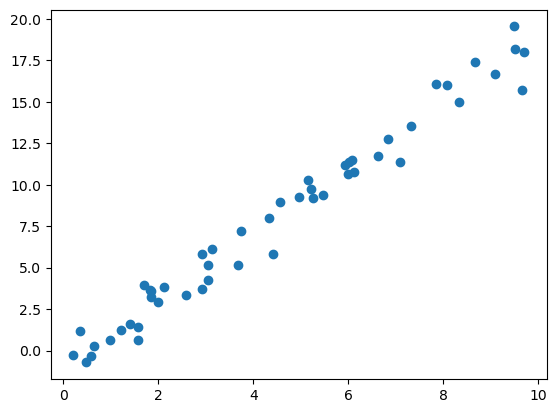

In [14]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

In [15]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

In [16]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

#### 3. Arrange data into a features matrix and target vector

In [17]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to the data

In [20]:
model.fit(X, y)

LinearRegression()

In [23]:
model.coef_   # slope

array([1.9776566])

In [24]:
model.intercept_   # intercept

-0.9033107255311164

#### 5. Predict labels for unknown data

In [26]:
xfit = np.linspace(-1, 11)

In [27]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

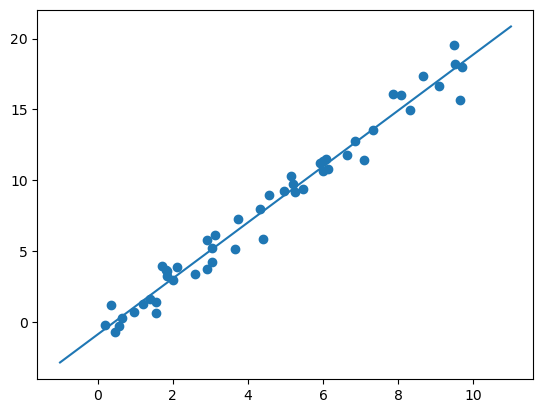

In [28]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised Learning Example: Iris Classification

In [32]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state = 1)

In [33]:
from sklearn.naive_bayes import GaussianNB   # 1. Choose model class
model = GaussianNB()                         # 2. Instantiate model
model.fit(Xtrain, ytrain)                    # 3. Fit model to data
y_model = model.predict(Xtest)               # 4. Predict on new data

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised Learning Example: Iris Dimensionality

In [35]:
from sklearn.decomposition import PCA   # 1. Choose model class
model = PCA(n_components = 2)           # 2. Instantiate model
model.fit(X_iris)                       # 3. Fit model to data
X_2D = model.transform(X_iris)          # 4. Transform the data

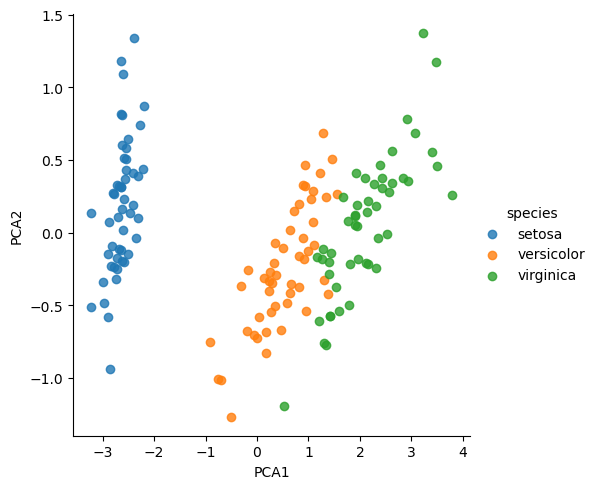

In [37]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = 'PCA1', y = 'PCA2', hue = 'species', 
           data = iris, fit_reg = False);

#### Unsupervised Learning Example: Iris Clustering

In [38]:
from sklearn.mixture import GaussianMixture         # 1. Choose model class
model = GaussianMixture(n_components = 3,
                        covariance_type = 'full')   # 2. Instantiate model
model.fit(X_iris)                                   # 3. Fit model to data
y_gmm = model.predict(X_iris)                       # 4. Determine labels

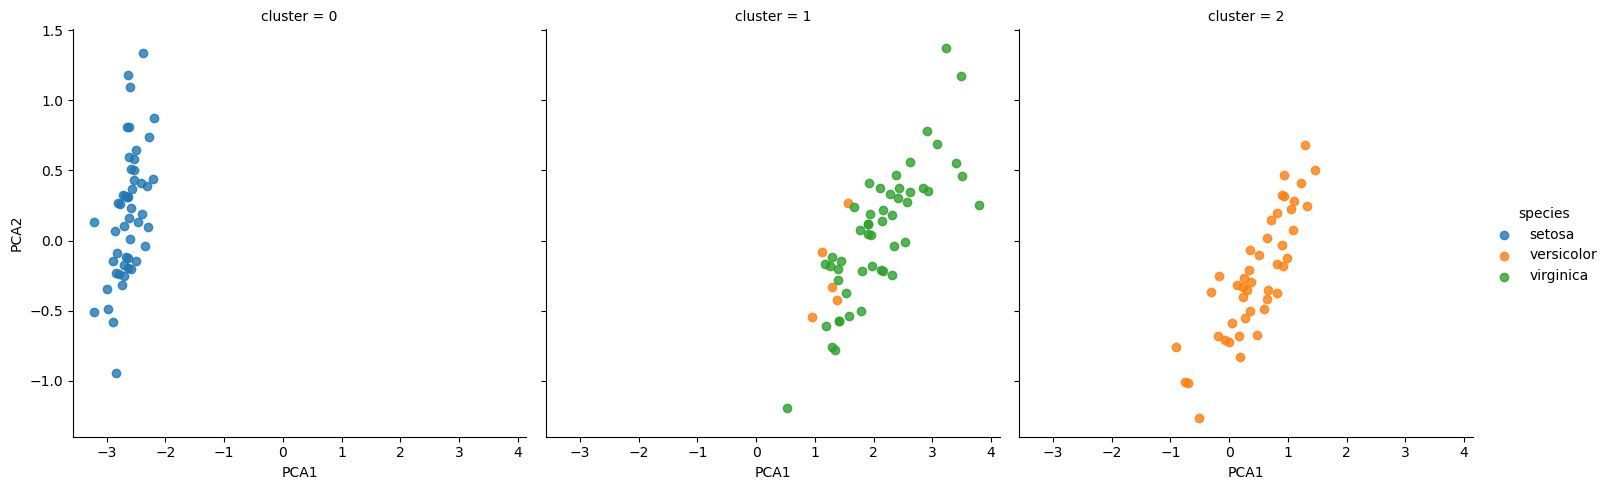

In [47]:
iris['cluster'] = y_gmm
sns.lmplot(x = 'PCA1', y = 'PCA2', data = iris, hue = 'species', 
           col = 'cluster', fit_reg = False);

### Application: Exploring Handwritten Digits. Loading and Visualizing the Digits Data

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

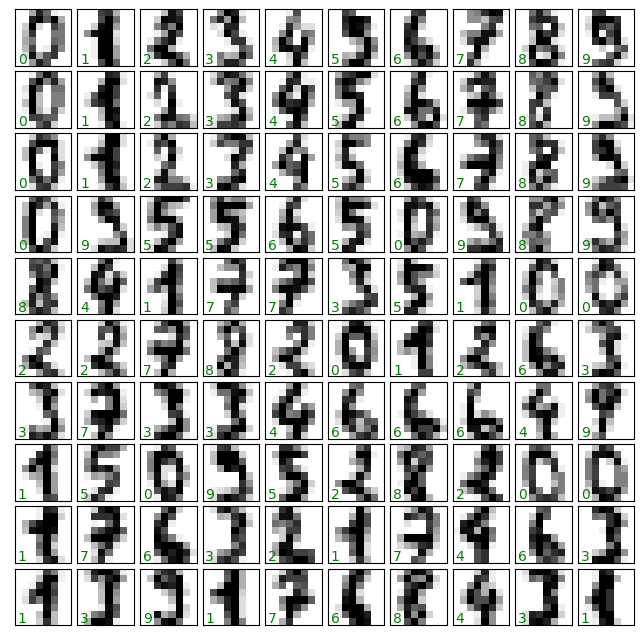

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform = ax.transAxes, color = 'green')

In [51]:
X = digits.data
X.shape

(1797, 64)

In [52]:
y = digits.target
y.shape

(1797,)

### Unsupervised Learning Example: Dimensionality Reduction

In [54]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


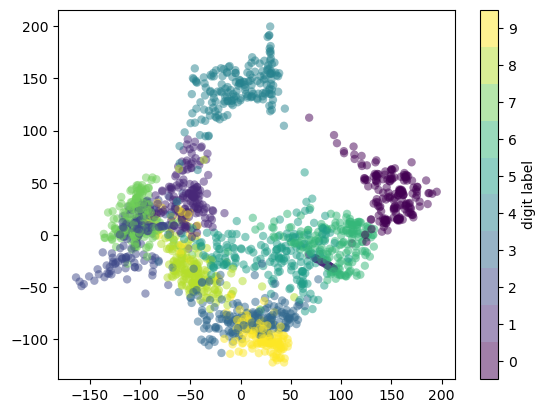

In [55]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target,
            edgecolor = 'none', alpha = 0.5,
            cmap = plt.cm.get_cmap('viridis', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5);

### Classification on Digits

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [58]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

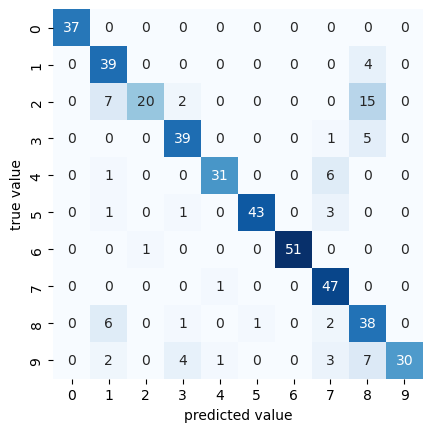

In [60]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square = True, annot = True, cbar = False, cmap = 'Blues')

plt.xlabel('predicted value')
plt.ylabel('true value');

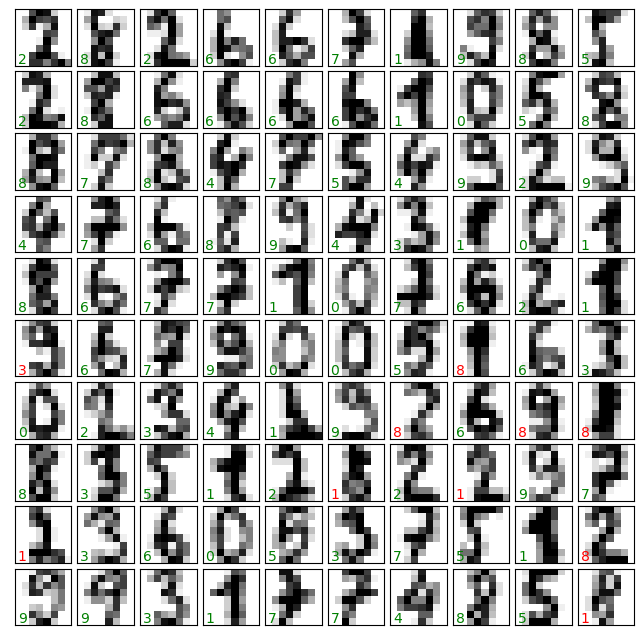

In [61]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform = ax.transAxes,
            color = 'green' if (ytest[i] == y_model[i]) else 'red')

### Hyperparameters and Model Validation

### Model Validation the Wrong Way

In [63]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [67]:
model.fit(X, y)
y_model = model.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

### Model Validation the Right Way: Holdout Sets

In [69]:
from sklearn.model_selection import train_test_split

# Split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, 
                                  train_size = 0.5)

# Fit the model on one set of data
model.fit(X1, y1)

# Evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9066666666666666

### Model Validation via Cross-Validation

In [70]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(0.96, 0.9066666666666666)

In [71]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [72]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut())
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [73]:
scores.mean()

0.96

### Validation Curves in Scikit-Learn